# Tilt Correction

This module will correct the tilt of the image. The pipeline performs the following operations:

- Load image without legend
- Dilate the image

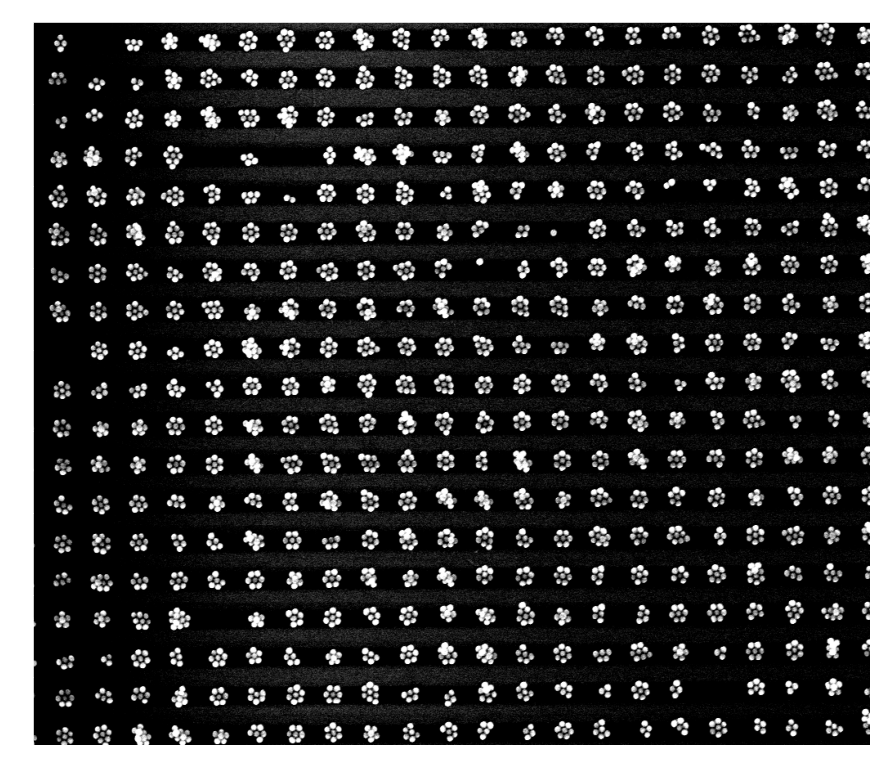

In [1]:
%matplotlib inline

import src.modules.oiplib as lib

img = lib.loadImage("images/croppedImage.png")

originalPlot, originalAx = lib.showImage(img, title="Original image", figsize=(15,15))

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1acc6310>)

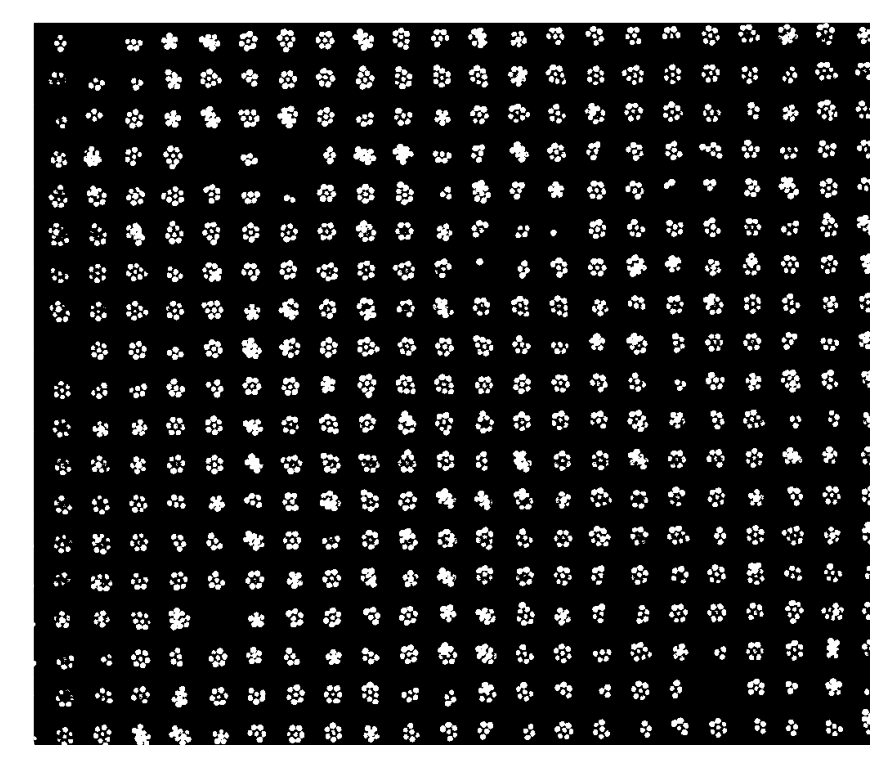

In [2]:
import scipy

imgBin = lib.threshold_binary(img, 127)[:,:,0]

lib.showImage(imgBin * 255, title="Binary image",figsize=(15,15))

Time =  0.45119189999999776


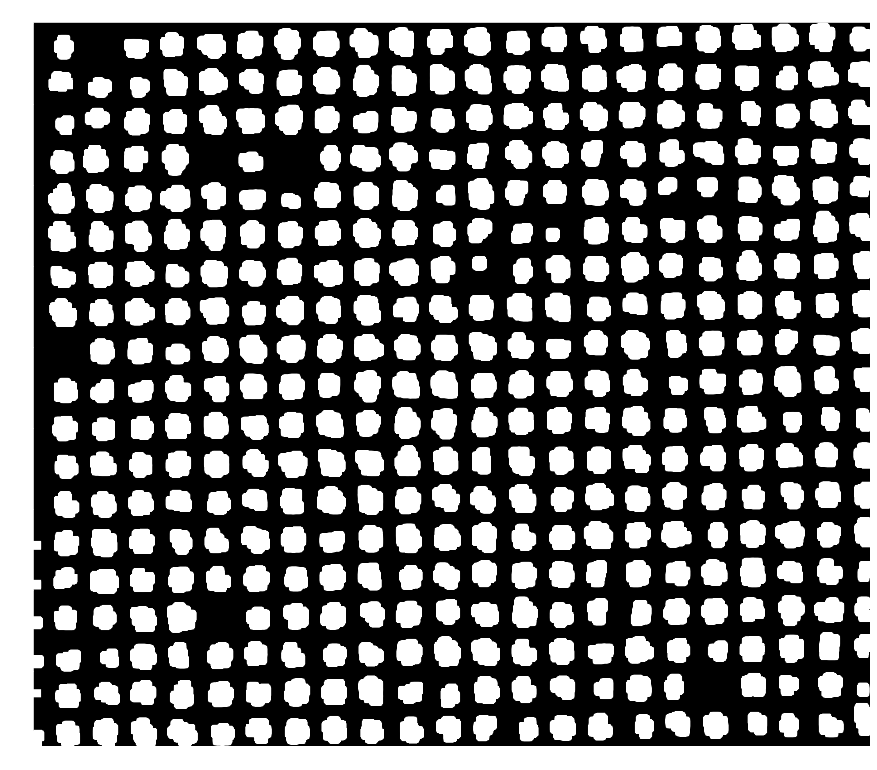

In [3]:
#struct = scipy.ndimage.generate_binary_structure(2, 1)
#struct = [[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]

# Create structure
import numpy as np
struct = np.ones((10,10))

# Import time library for performance testing.
import time

# Start performance timer.
start = time.perf_counter()

# Convolute image and structure
imgDilated = scipy.signal.convolve2d(imgBin, struct, fillvalue=0)

# Stop performance timer
stop = time.perf_counter()

convolveTime = stop-start
print("Time = ", (convolveTime))

dilatedFig, dilatedAx = lib.showImage(imgDilated, vmax=1,title="Dilated image", figsize=(15,15))

In [4]:
# imgDilatedInv = np.invert(imgDilated.astype(np.bool)).astype(np.uint8)

# lib.showImage(imgDilatedInv, vmax=1, title="Dilated Inverted Image", figsize=(15,15))

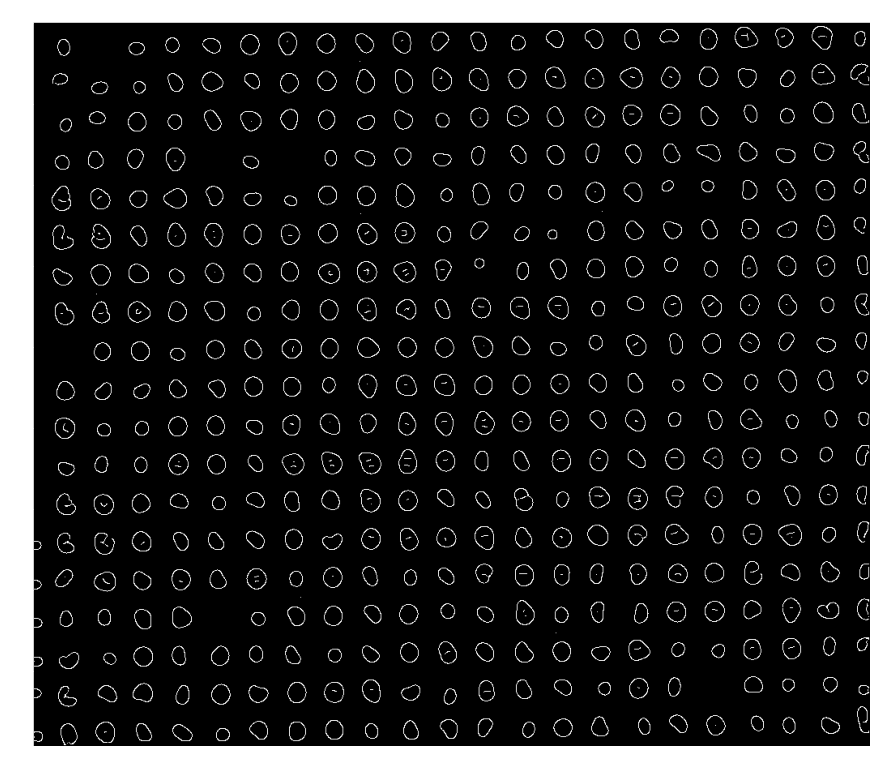

In [5]:
from skimage import feature

edges = feature.canny(imgDilated, sigma=4).astype(np.uint8)

edgesPlot, edgesAx = lib.showImage(edges, vmax=1, figsize=(15,15))

In [6]:
blobs = feature.blob_log(imgDilated, min_sigma=5, max_sigma=25, threshold=1, exclude_border=True)

from math import sqrt
# Compute radii in the 3rd column.
# From https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html
blobs[:, 2] = blobs[:, 2] * sqrt(2) 

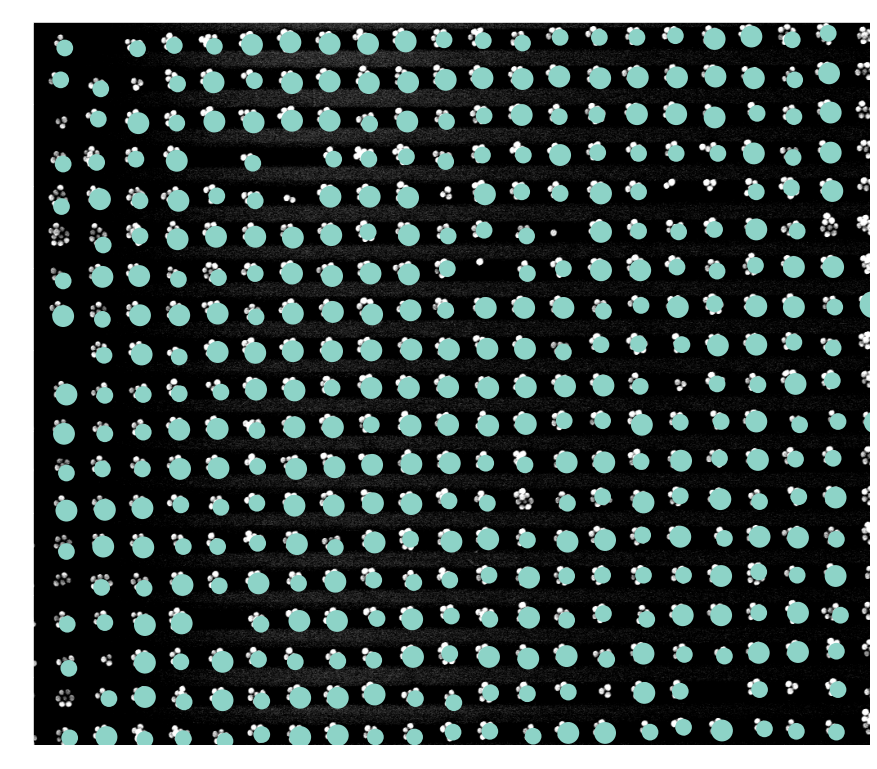

In [7]:
from matplotlib import pyplot as plt

for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x,y), r)
    dilatedAx.add_patch(c)

lib.showImage(img, title="Circles", fig=dilatedFig, ax=dilatedAx)[0]

(<Figure size 1080x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c730cd0>)

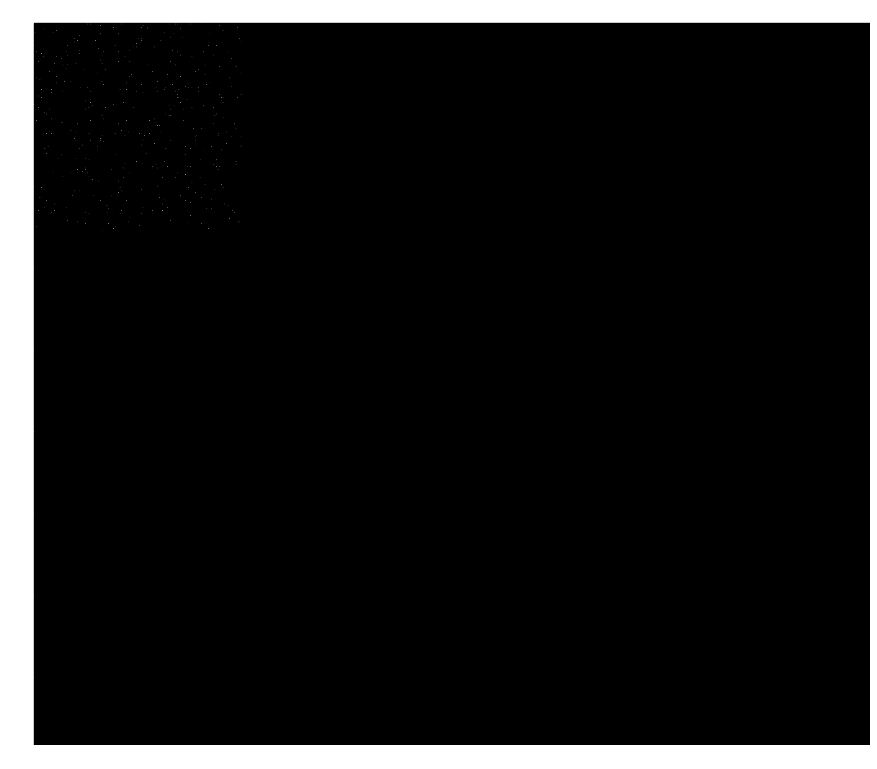

In [13]:
points = np.zeros(img.shape)

for blob in blobs:
    y, x, r = blob.astype(np.uint8)
    points[x,y] = 1

lib.showImage(points, vmax=1, figsize=(15,15))

In [9]:
points.shape[0]

884

In [10]:
#from skimage import transform
#from skimage.draw import line

#hspace, angles, distances = transform.hough_line(imgDilatedInv)
#hspace, angles, dists = transform.hough_line_peaks(hspace, angles, distances)

Accumulator, maxIDX, maxTH, maxR = lib.hough_lines(points[:,:,], 360, 100, 50)



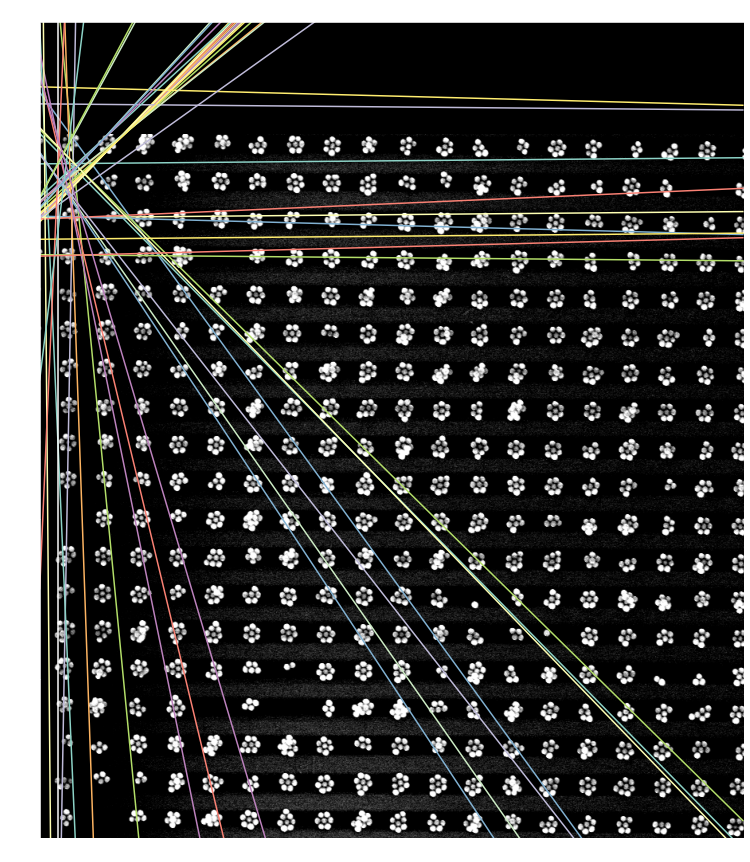

In [11]:
for i in range(50): 
    lib.plot_line_rth(img.shape[0], img.shape[1], maxR[i], maxTH[i], originalAx)

lib.showImage(img, title="Original image", fig=originalPlot,ax=originalAx)[0]